# MIL

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from mildetector.mil import MIL
import time, cv2
import misvm

# Definition

In [2]:
mil = MIL(method='img', experience='pitchtypes', dirName='p-hard_n-easy', estimatorName='misvm', runenv='jupyter', debug=True)

# Load data and create bag

In [3]:
#mil.setData(positiveCsvFileName='hard-video.csv', negativeCsvFileName='easy-video.csv', dicimate=1, 
#joint2imgkwargs={'save': True},
#mhkwargs={'duration': 0.001, 'save': True})
mil.setData(positiveCsvFileName='hard-video.csv', negativeCsvFileName='easy-video.csv', dicimate=1, 
joint2imgkwargs={'save': False},
mhkwargs={'duration': 0.001, 'save': False})

reading and converting into feature vectors...
 [####################]:100%
positive: 15, negative: 15


# Grid Search

In [4]:
estimator = misvm.miSVM(max_iters=250, verbose=False)
params_grid = [{'gamma': [0.1, 0.5, 0.01, 0.05, 0.001, 0.005, 0.0001], 'C': [10, 50, 100, 500, 1000, 5000, 10000], 'kernel': ['rbf']}]
mil.gridSearch(estimator=estimator, params_grid=params_grid, cv=2, threadNum=16)

/home/jkado/.conda/envs/mildetector/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'split1_test_score': array([0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.57142857, 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.57142857, 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.57142857, 0.5       , 0.5       ,
       0.5       , 0.5       , 0.42857143, 0.5       , 0.57142857,
       0.5       , 0.5       , 0.5       , 0.5       , 0.42857143,
       0.5       , 0.57142857, 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.57142857]), 'std_score_time': array([0.01754904, 0.14593983, 0.06304193, 0.03378999, 1.65503287,
       0.18146408, 0.19747174, 0.00426745, 0.4726932 , 0.01793551,
       0.05043256, 2.62280917, 3.51720738, 0.07670176, 0.03561711,
       0.35604918, 0.23407423, 0.11362576, 0.72149801, 3.54496944,
       0.02337909, 0.01100302, 0

# Search Gamma

In [5]:
mil.searchGamma(ini=0.0001, fin=0.001, step=0.00001, randomSampledTrainRatio=0.8)

gamma:0.0001 --> variance:0.0006533427941730071
gamma:0.00011 --> variance:0.0007758723754199507
gamma:0.00012 --> variance:0.0009062314228100613
gamma:0.00013000000000000002 --> variance:0.001043861614280436
gamma:0.00014000000000000001 --> variance:0.0011882280079048364
gamma:0.00015000000000000001 --> variance:0.0013388182216798853
gamma:0.00016 --> variance:0.00149514163981223
gamma:0.00017 --> variance:0.0016567286446865163
gamma:0.00018 --> variance:0.001823129873718827
gamma:0.00019 --> variance:0.001993915500324269
gamma:0.0002 --> variance:0.002168674538250737
gamma:0.00021 --> variance:0.0023470141685535363
gamma:0.00022000000000000003 --> variance:0.002528559088507486
gamma:0.00023 --> variance:0.002712950881774453
gamma:0.00024000000000000003 --> variance:0.002899847409164926
gamma:0.00025 --> variance:0.0030889222193522577
gamma:0.00026000000000000003 --> variance:0.0032798639789177616
gamma:0.00027 --> variance:0.0034723759211235787
gamma:0.00028000000000000003 --> varian

In [6]:
mil.searchGamma(ini=0.001, fin=0.01, step=0.001, randomSampledTrainRatio=0.8)

gamma:0.001 --> variance:0.01371174119197114
gamma:0.002 --> variance:0.01110773678643857
the biggest variance is 0.001:0.01371174119197114
K is:
[[0.63783347 0.64198097 0.61286591 ... 0.27101239 0.27012804 0.25565126]
 [0.61884633 0.6170877  0.61157273 ... 0.27926475 0.27601917 0.26606792]
 [0.57050784 0.57655771 0.57050699 ... 0.28344524 0.27697564 0.2673978 ]
 ...
 [0.29770822 0.30770924 0.3061411  ... 0.75789883 0.71003336 0.7092366 ]
 [0.29201715 0.30287054 0.30089633 ... 0.7840244  0.74398434 0.74276707]
 [0.28916    0.30025362 0.29770839 ... 0.77230353 0.73684855 0.7671778 ]]


In [7]:
mil.searchGamma(ini=0.001, fin=0.002, step=0.0001, randomSampledTrainRatio=0.8)

gamma:0.001 --> variance:0.012923699189820836
gamma:0.0011 --> variance:0.013194024978865598
gamma:0.0012000000000000001 --> variance:0.013271589968771104
gamma:0.0013 --> variance:0.013187884032598655
the biggest variance is 0.0012000000000000001:0.013271589968771104
K is:
[[0.59738972 0.58226083 0.57330624 ... 0.19593206 0.19285836 0.17808424]
 [0.54740662 0.54467227 0.53518618 ... 0.1948435  0.19066338 0.17761686]
 [0.54706117 0.54347597 0.53380288 ... 0.19046685 0.18623174 0.17315937]
 ...
 [0.20803658 0.20186643 0.21010705 ... 0.73097398 0.72263146 0.70977582]
 [0.2043298  0.19934718 0.20854235 ... 0.70720815 0.76731921 0.75690077]
 [0.19054883 0.18729283 0.19597306 ... 0.67619591 0.73940093 0.80280372]]


In [8]:
gamma = 0.0012
C = 1000
kernel = 'rbf'
paramDir='g{}/c{}'.format(gamma, C)
estimator = misvm.miSVM(kernel=kernel, gamma=gamma, C=C, verbose=False, max_iters=100)

mil.train(estimator=estimator, paramDir=paramDir)


accuracy will be for train data
[ 1, 1,-1, 1, 1, 1, 1,-1,-1, 1, 1, 1,-1,-1,-1,-1, 1, 1, 1,-1, 1,-1, 1,-1, -1,-1,-1,-1,-1, 1]
[ 1, 1,-1, 1, 1, 1, 1,-1,-1, 1, 1, 1,-1,-1,-1,-1, 1, 1, 1, 1,-1, 1, 1,-1,  1,-1,-1,-1,-1, 1]
Accuracy: 86.66666666666667
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


# check_identification_func_max

In [9]:
mil.check_identification_func_max(paramDir, estimator='misvm.pkl.cmp')

[ 1, 1,-1, 1, 1, 1, 1,-1,-1, 1, 1, 1,-1,-1,-1,-1, 1, 1, 1,-1, 1,-1, 1,-1, -1,-1,-1,-1,-1, 1]
[ 1, 1,-1, 1, 1, 1, 1,-1,-1, 1, 1, 1,-1,-1,-1,-1, 1, 1, 1, 1,-1, 1, 1,-1,  1,-1,-1,-1,-1, 1]
Accuracy: 86.66666666666667

videoname: Pitch_02_joined_p4_2
prediction labels: 1.0
right labels: 1
the maximum of identification func: 1.5191878437177433
maximum frame: 8

videoname: Pitch_03_joined_p2_1
prediction labels: 1.0
right labels: 1
the maximum of identification func: 1.1272233597684918
maximum frame: 14

videoname: Pitch_10_joined_p2_3
prediction labels: 1.0
right labels: 1
the maximum of identification func: 1.4736754849735476
maximum frame: 10

videoname: Pitch_11_joined_p2_4
prediction labels: 1.0
right labels: 1
the maximum of identification func: 0.9476094958218867
maximum frame: 9

videoname: Pitch_12_joined_p4_5
prediction labels: 1.0
right labels: 1
the maximum of identification func: 1.0912838364648487
maximum frame: 17

videoname: Pitch_15_joined_p2_5
prediction labels: 1.0
right l

# Reversed condition

In [2]:
%load_ext autoreload
%autoreload 2
from mildetector.mil import MIL
import time, cv2
import misvm
mil = MIL(method='img', experience='pitchtypes', dirName='p-easy_n-hard', estimatorName='misvm', runenv='jupyter', debug=False)
mil.setData(positiveCsvFileName='easy-video.csv', negativeCsvFileName='hard-video.csv', dicimate=1, 
joint2imgkwargs={'save': False},
mhkwargs={'duration': 0.001, 'save': False})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
reading and converting into feature vectors...
 [####################]:100%
positive: 15, negative: 15


# Grid Search

In [11]:
estimator = misvm.miSVM(max_iters=250, verbose=False)
params_grid = [{'gamma': [0.1, 0.5, 0.01, 0.05, 0.001, 0.005, 0.0001], 'C': [10, 50, 100, 500, 1000, 5000, 10000], 'kernel': ['rbf']}]
mil.gridSearch(estimator=estimator, params_grid=params_grid, cv=2, threadNum=16)

/home/jkado/.conda/envs/mildetector/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'split1_test_score': array([0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.57142857, 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.64285714, 0.5       ,
       0.57142857, 0.5       , 0.5       , 0.5       , 0.5       ,
       0.57142857, 0.5       , 0.57142857, 0.57142857, 0.57142857,
       0.5       , 0.5       , 0.57142857, 0.5       , 0.5       ,
       0.57142857, 0.57142857, 0.5       , 0.5       , 0.57142857,
       0.5       , 0.57142857, 0.57142857, 0.57142857]), 'std_score_time': array([1.17970228e-01, 1.64278746e-02, 1.03826523e-01, 4.94658947e-03,
       2.78664279e+00, 2.65362382e-01, 4.16761637e-02, 4.72033024e-03,
       5.73172569e-02, 5.12719154e-04, 1.22944117e-02, 1.54061675e+00,
       5.57462335e-01, 3.20966423e+00, 1.03558302e-02, 1.00400209e-01,
       3.5349965

# Definition

In [3]:
gamma = 0.0012
C = 1000
kernel = 'rbf'
paramDir='g{}/c{}'.format(gamma, C)
estimator = misvm.miSVM(kernel=kernel, gamma=gamma, C=C, verbose=False, max_iters=100)

# Train

In [13]:
mil.train(estimator=estimator, paramDir=paramDir)

accuracy will be for train data
[-1,-1, 1,-1,-1,-1,-1, 1, 1,-1,-1,-1, 1, 1, 1, 1,-1,-1,-1, 1,-1, 1,-1, 1,  1, 1, 1, 1, 1,-1]
[-1,-1, 1,-1, 1,-1,-1, 1, 1,-1,-1, 1, 1, 1, 1, 1,-1,-1, 1, 1,-1, 1,-1, 1,  1, 1, 1, 1, 1,-1]
Accuracy: 90.0
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [14]:
mil.check_identification_func_max(paramDir, estimator='misvm.pkl.cmp')

[-1,-1, 1,-1,-1,-1,-1, 1, 1,-1,-1,-1, 1, 1, 1, 1,-1,-1,-1, 1,-1, 1,-1, 1,  1, 1, 1, 1, 1,-1]
[-1,-1, 1,-1, 1,-1,-1, 1, 1,-1,-1, 1, 1, 1, 1, 1,-1,-1, 1, 1,-1, 1,-1, 1,  1, 1, 1, 1, 1,-1]
Accuracy: 90.0

videoname: Pitch_08_joined_p1_1
prediction labels: 1.0
right labels: 1
the maximum of identification func: 1.3100129704663015
maximum frame: 16

videoname: Pitch_11_joined_p2_4
prediction labels: 1.0
right labels: -1
the maximum of identification func: 0.059932719235516296
maximum frame: 0

videoname: Pitch_16_joined_p3_3
prediction labels: 1.0
right labels: 1
the maximum of identification func: 1.1387923493006848
maximum frame: 4

videoname: Pitch_17_joined_p1_4
prediction labels: 1.0
right labels: 1
the maximum of identification func: 1.6030722155436559
maximum frame: 26

videoname: Pitch_22_joined_p1_7
prediction labels: 1.0
right labels: -1
the maximum of identification func: 0.26078693938421166
maximum frame: 100

videoname: Pitch_23_joined_p2_6
prediction labels: 1.0
right labels: 

# Leave one person out

In [15]:
mil.leaveOnePersonOut(estimator, paramDir, trainAcc=True)

Accuracy: 50.0
accuracies for train
{'r3': 92.0, 'r4': 81.81818181818183, 'r1': 95.23809523809523, 'r2': 86.36363636363636}


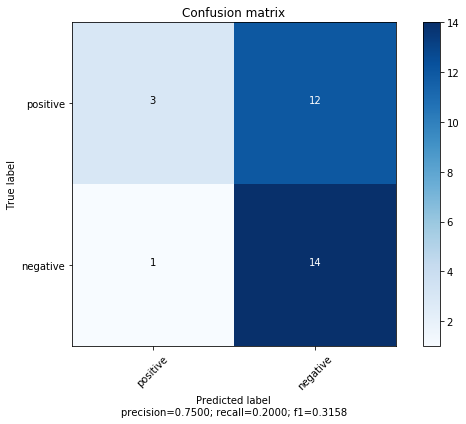

In [15]:
labels, predicted_labels = mil.parse_txt(paramDir, 'leave-one-person-out.txt')
mil.confusion_matrix(predicted_labels, normalize=False, savepath='./result/pitchtypes/p-easy_n-hard/g0.0012/c1000/leave-one-person-out.png')

# Leave one out

In [17]:
mil.leaveOneOut(estimator, paramDir, n_jobs=16, trainAcc=True)

Accuracy: 56.666666666666664
Accuracy: 56.666666666666664
accuracies for train
[89.65517241379311, 89.65517241379311, 82.75862068965517, 89.65517241379311, 86.20689655172413, 89.65517241379311, 93.10344827586206, 89.65517241379311, 89.65517241379311, 89.65517241379311, 93.10344827586206, 89.65517241379311, 89.65517241379311, 89.65517241379311, 89.65517241379311, 82.75862068965517, 93.10344827586206, 89.65517241379311, 93.10344827586206, 89.65517241379311, 89.65517241379311, 93.10344827586206, 89.65517241379311, 86.20689655172413, 89.65517241379311, 89.65517241379311, 93.10344827586206, 89.65517241379311, 89.65517241379311, 93.10344827586206]


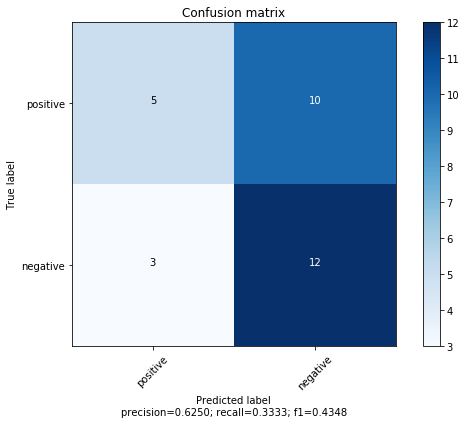

In [14]:
labels, predicted_labels = mil.parse_txt(paramDir, 'leave-one-out.txt')
mil.confusion_matrix(predicted_labels, normalize=False, savepath='./result/pitchtypes/p-easy_n-hard/g0.0012/c1000/leave-one-out.png')